In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab
import matplotlib.pyplot as plt


In [11]:
#for binned data
# we use v1 that is the version that doesn't have the numeration corrected
#data_1 = pd.read_csv('/Users/bdmlab/Documents/GiTs/FF2018/InputData/GlamDataFF2018_Like_Bin_v2_GAZE_BINS_TEST.csv')
data_1 = pd.read_csv('/Users/pradyumna/Documents/gitDocs/FF2018/InputData/GlamDataFF2018_Like_Bin_v2_GAZE_BINS_TEST.csv')


#
data_1 = data_1.apply(pd.to_numeric, errors='ignore')

data_1 = data_1.drop(['Unnamed: 0'], 1)


In [12]:
data_1

,subject,trial,rt,choice,item_value_0,item_value_1,gaze_0,gaze_1,DGaze
0,0,0,2009,0,0,0,0.568396,0.431604,0.136792
1,0,1,3371,0,5,4,0.762332,0.237668,0.524664
2,0,2,1700,1,0,5,0.446809,0.553191,-0.106383
3,0,3,7466,1,1,2,0.532352,0.467648,0.064704
4,0,4,1889,1,5,5,0.529736,0.470264,0.059473
5,0,5,2227,1,4,4,0.370529,0.629471,-0.258943
6,0,6,4259,0,4,0,0.482254,0.517746,-0.035493
7,0,7,3505,0,3,0,0.670739,0.329261,0.341478
8,0,8,2548,0,3,0,0.528497,0.471503,0.056995
9,0,9,3226,1,0,5,0.581579,0.418421,0.163158


In [13]:
bins = np.linspace(-1, 1, 8+1)
bins

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [14]:
data_1['DGaze'] = pd.cut(data_1['DGaze'],
                                               bins=bins, include_lowest=True,
                                               labels=bins[:-1])

In [15]:
data_1

,subject,trial,rt,choice,item_value_0,item_value_1,gaze_0,gaze_1,DGaze
0,0,0,2009,0,0,0,0.568396,0.431604,0.00
1,0,1,3371,0,5,4,0.762332,0.237668,0.50
2,0,2,1700,1,0,5,0.446809,0.553191,-0.25
3,0,3,7466,1,1,2,0.532352,0.467648,0.00
4,0,4,1889,1,5,5,0.529736,0.470264,0.00
5,0,5,2227,1,4,4,0.370529,0.629471,-0.50
6,0,6,4259,0,4,0,0.482254,0.517746,-0.25
7,0,7,3505,0,3,0,0.670739,0.329261,0.25
8,0,8,2548,0,3,0,0.528497,0.471503,0.00
9,0,9,3226,1,0,5,0.581579,0.418421,0.00


In [16]:
data_1['left_chosen'] = data_1['choice'] == 0


In [17]:
data_1

,subject,trial,rt,choice,item_value_0,item_value_1,gaze_0,gaze_1,DGaze,left_chosen
0,0,0,2009,0,0,0,0.568396,0.431604,0.00,True
1,0,1,3371,0,5,4,0.762332,0.237668,0.50,True
2,0,2,1700,1,0,5,0.446809,0.553191,-0.25,False
3,0,3,7466,1,1,2,0.532352,0.467648,0.00,False
4,0,4,1889,1,5,5,0.529736,0.470264,0.00,False
5,0,5,2227,1,4,4,0.370529,0.629471,-0.50,False
6,0,6,4259,0,4,0,0.482254,0.517746,-0.25,True
7,0,7,3505,0,3,0,0.670739,0.329261,0.25,True
8,0,8,2548,0,3,0,0.528497,0.471503,0.00,True
9,0,9,3226,1,0,5,0.581579,0.418421,0.00,False


In [18]:
subject_means = data_1.groupby(['subject', 'DGaze']).left_chosen.mean()
means = subject_means.groupby('DGaze').mean()
sems = subject_means.groupby('DGaze').sem()


In [19]:
means

DGaze
-1.00    0.240741
-0.75    0.111258
-0.50    0.135963
-0.25    0.271841
 0.00    0.720916
 0.25    0.871331
 0.50    0.924330
 0.75    0.400000
Name: left_chosen, dtype: float64

In [20]:
subject_means[0]

DGaze
-0.50    0.000000
-0.25    0.176471
 0.00    0.720000
 0.25    0.947368
 0.50    1.000000
 0.75    0.000000
Name: left_chosen, dtype: float64

In [21]:
x = np.arange(len(means))

In [22]:
x

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.bar(x, means,
                   linewidth=1, edgecolor='k', facecolor='w',
                   width=0.5)

<Container object of 8 artists>

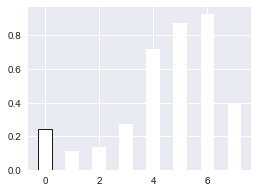

In [26]:
fig